# Hierarchical Clustering 

In [1]:
# Imports

import sys, os

ex_path = os.path.abspath(os.pardir)
if ex_path not in sys.path:
    sys.path.append(ex_path)

from src.hier_example import *
from sklearn.datasets import make_blobs
from src.av_link_agglom_clust import centrAggClust as ac
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.datasets import make_blobs, make_moons, load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KernelDensity
from sklearn.metrics import silhouette_score

%matplotlib inline

## Learning Objectives

- describe the algorithms of agglomerative and divisive hierarchical clustering;
- compare and contrast hierarchical clustering with $k$-means clustering;
- implement hierarchical clustering with `scipy` and `sklearn`;
- build and interpret dendrograms.

## Intuition Behind Agglomerative Clustering

Let's draw some data points!

## Scenario

You worked on creating market segmentation groups using kmeans on customer shopping records, but you're not sure kmeans was the best method. By the end of this lesson, you want to find the appropriate number of groups and their descriptions.

## Hierarchical Agglomerative Clustering

Recall $k$-means clustering where the goal is to assign individual observations to a pre-specified number of clusters according to Euclidean distance between the centroid and the observation. Hierarchical clustering sets out to group the most similar two observations together from a bottom-up level. We end up with a tree-like diagram called a **dendrogram**, which allows us to view the clusterings obtained for each possible number of clusters, from 1 to n. It is up to our discretion as data scientists to decide how many clusters we want. 

![dendro](images/dendogram.png)

***
One disadvantage of $k$-means clustering is that we have to specify the number of clusters beforehand. The type of hierchical clustering we will learn today is **agglomerative**, or **bottom-up**, such that we do not have to specify the number of clusters beforehand. We will now dive into the details of hierchical clustering.

There is also **top-down** or **divisive** clustering, where one starts with the entire dataset as a single cluster.
***

### How does the algorithm work

Initially, every observation is its own cluster. As we move up the leaf of the dendrogram, the two most similar observations fuse together, and then the next most similar clusters fuse together etc. until everything fuses together into a big cluster. Where to stop is up to our discretion. 

![dendro2](images/400_Basic_Dendrogram.png)

## Agglomerative example

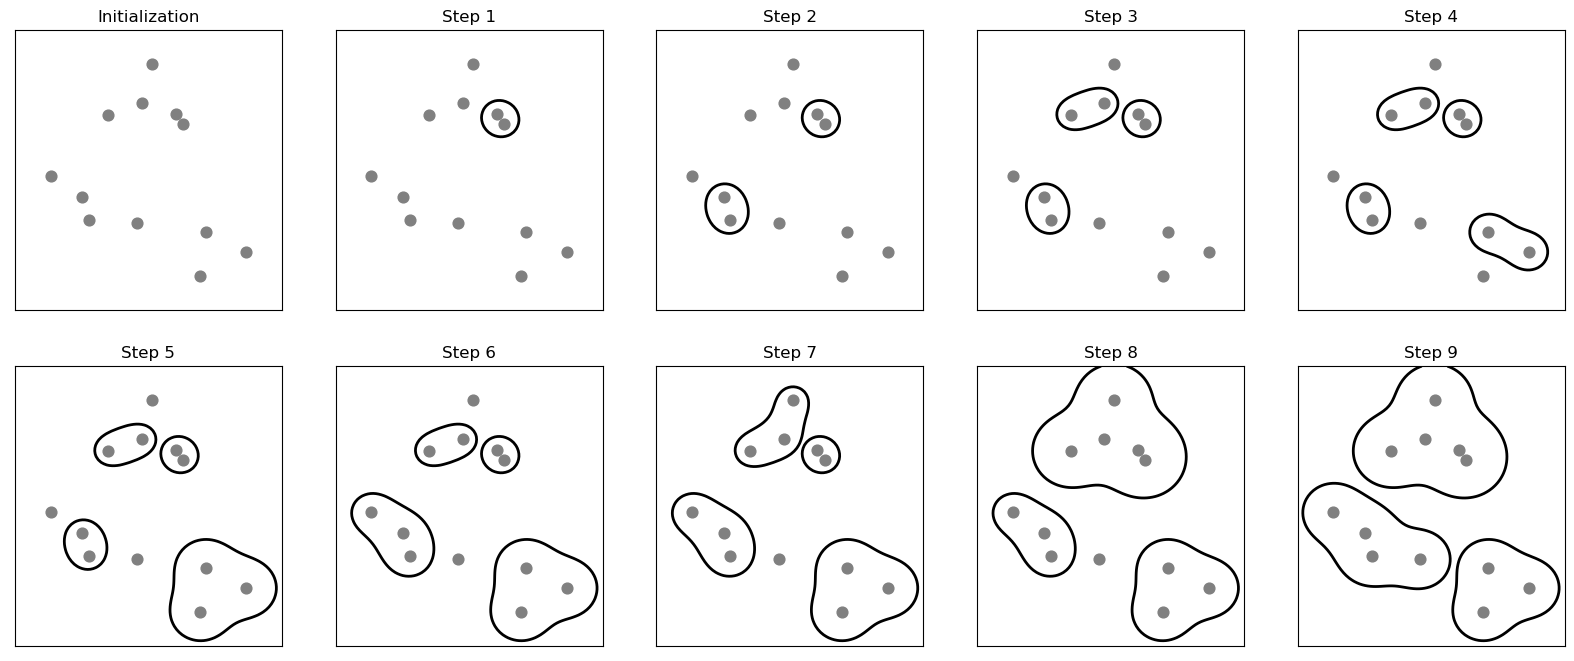

In [2]:
plot_agglomerative_algorithm()

### Types of hierarchical agglomerative clustering 

The way that distance is measured between clusters is called the model's **linkage**.

- Single Linkage 
    -  Minimum pair-wise distance: for any two clusters, take one observation from each and determine their distance. Do this over and over, until you have identified the overall minimum pair-wise distance. 
- Complete Linkage
    -  Complete linkage may be defined as the furthest (or maximum) distance between two clusters. That is, all possible pairwise distances between elements (one from cluster A and one from B) are evaluated and the largest value is used as the distance between clusters A & B. This is sometimes called complete linkage and is also called furthest neighbor.
- Average Linkage
    - The distance between clusters is defined as the average distance between the data points in the clusters. 
- Ward Linkage
    -  Ward method finds the pair of clusters that leads to minimum increase in total within-cluster variance after merging at each step.

[This article](https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec) describes the pros and cons of each approach.

### How well does the dendrogram fit the data?

One way of computing this is by means of the **cophenetic correlation coefficient**, which, in a word, is a measure of "how faithfully the dendrogram preserves the pairwise distances between the \[datapoints\]" -- [Wikipedia](https://en.wikipedia.org/wiki/Cophenetic_correlation).

The cophenetic correlation coefficient $c$ is given by [ref](https://www.mathworks.com/help/stats/index.html?/access/helpdesk/help/toolbox/stats/cophenet.html=)

![c-coef](images/cophenet.png)


$x(i, j) = | Xi − Xj |$, the ordinary Euclidean distance between the $i$th and $j$th observations.<br>
$t(i, j)$ = the dendrogrammatic distance between the model points $Ti$ and $Tj$. This distance is the height of the node at which these two points are first joined together.<br>

Then, letting ${\bar {x}}$ be the average of the $x(i, j)$, and letting ${\bar {t}}$ be the average of the $t(i, j)$, the cophenetic correlation coefficient $c$ is given by[4]

This is complicated! [This site](https://people.revoledu.com/kardi/tutorial/Clustering/Online-Hierarchical-Clustering.html) is helpful on how to understand the cophenetic correlation, and, indeed, on hierarchical clustering generally.

## Seeing it in action

[This post here](https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/) walks through cluster assignment _step_ by _step_.

3

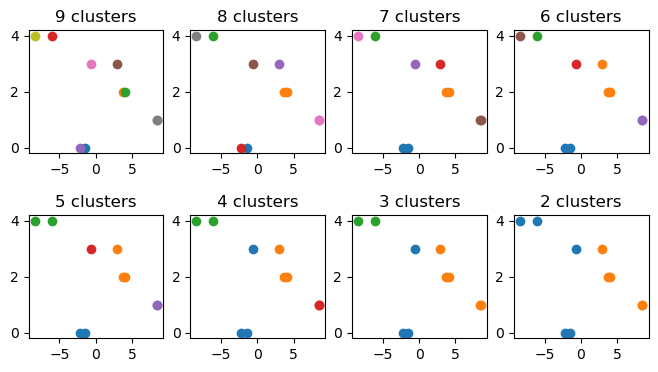

In [3]:
X, Y = make_blobs(n_samples=10, n_features=1,
                  centers=5, random_state=42)
ac(X, Y)

3

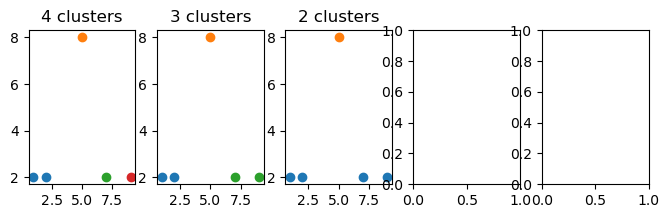

In [4]:
X2 = [1, 2, 5, 7, 9]
Y2 = [2, 2, 8, 2, 2]

ac(X2, Y2)

Meanwhile, we can do it in _**scipy**_ and _**sklearn**_

### Hierarchical clustering with `scipy`

(150, 2)


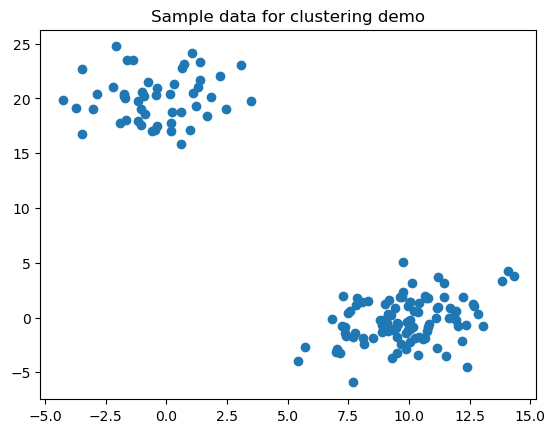

In [5]:
# Let's generate some data and look at an example of
# hierarchical agglomerative clustering.
# Generate two clusters: a with 100 points, b with 50:

np.random.seed(1000)

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b))

print(X.shape)  # 150 samples with 2 dimensions
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1])
ax.set_title("Sample data for clustering demo");

In [6]:
# construct dendrogram in scipy

Z = linkage(X, 'single')

In [7]:
Z.shape

(149, 4)

In [8]:
Z[:5, :]

array([[4.00000000e+00, 9.20000000e+01, 2.96678503e-02, 2.00000000e+00],
       [7.00000000e+01, 9.10000000e+01, 6.04706721e-02, 2.00000000e+00],
       [4.40000000e+01, 7.90000000e+01, 6.86073680e-02, 2.00000000e+00],
       [5.00000000e+00, 8.90000000e+01, 7.13464569e-02, 2.00000000e+00],
       [5.30000000e+01, 7.50000000e+01, 8.37051268e-02, 2.00000000e+00]])

Z contains the dendrogram in coded form! Its third column has distances. https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

`pdist()` calculates pairwise distances for an input array of points.

In [9]:
X[:4, :]

array([[ 9.51248139, -1.73096401],
       [10.81711837, -0.56938319],
       [10.17149359, -0.86587806],
       [ 9.24846837,  0.19305803]])

In [10]:
print(((X[0, 0] - X[1, 0])**2 + (X[0, 1] - X[1, 1])**2)**0.5)
print(((X[0, 0] - X[2, 0])**2 + (X[0, 1] - X[2, 1])**2)**0.5)
print(((X[0, 0] - X[3, 0])**2 + (X[0, 1] - X[3, 1])**2)**0.5)

1.7468107108136448
1.0875066748278819
1.942051409039251


In [11]:
pdist(X)[:3]

array([1.74681071, 1.08750667, 1.94205141])

In [12]:
len(X)

150

In [14]:
len(pdist(X))

11175

In [13]:
# For each point, there are 149 distances
# to other points.

150*149 // 2

11175

In [15]:
c, coph_dists = cophenet(Z, pdist(X))
c

0.9786391269542297

In [16]:
coph_dists[:5]

array([0.59994881, 0.49632455, 0.544156  , 0.6004741 , 0.6004741 ])

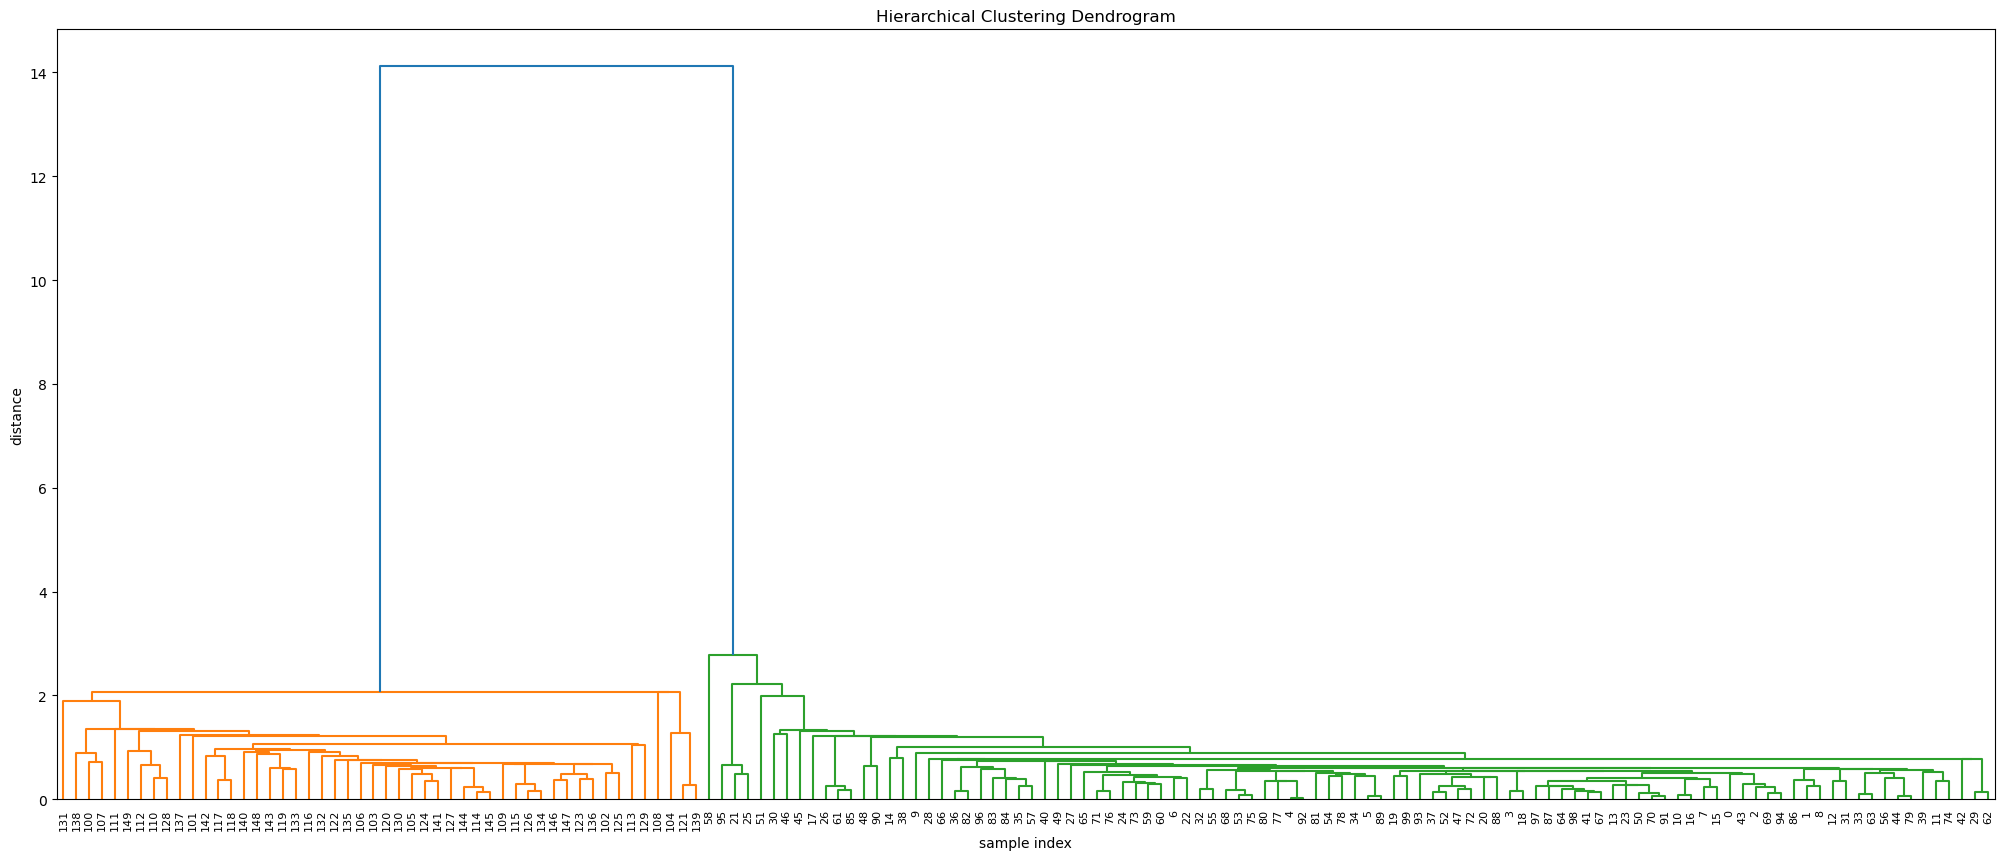

In [17]:
# calculate and construct the dendrogram 
# calculate full dendrogram

fig, ax = plt.subplots(figsize=(25, 10))
ax.set_title('Hierarchical Clustering Dendrogram')
ax.set_xlabel('sample index')
ax.set_ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
);

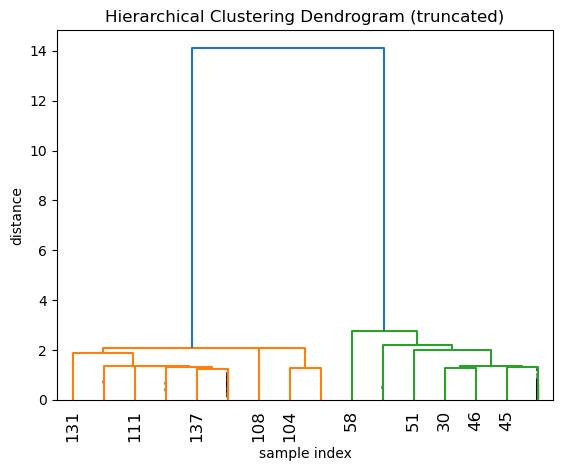

In [19]:
# trimming and truncating the dendrogram 

fig, ax = plt.subplots()
ax.set_title('Hierarchical Clustering Dendrogram (truncated)')
ax.set_xlabel('sample index')
ax.set_ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=16,
    show_leaf_counts=False, # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True    # to get a distribution impression in
                            #truncated branches
);

### Hierarchical clustering with `sklearn` on Iris

**[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)** for AgglomerativeClustering in `sklearn`


**[A great example of using Manhattan distance](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_clustering_metrics.html#sphx-glr-auto-examples-cluster-plot-agglomerative-clustering-metrics-py)** with agglomerative clustering in `sklearn`.

In [20]:
# we can also use the scikitlearn module hierarchical clustering
# to perform the same task

np.random.seed(2000)

In [21]:
# try clustering on the iris dataset

iris = load_iris()

# in this case, we won't be working with predicting labels,
# so we will only use the features (X)

X_iris = iris.data
y_iris = iris.target

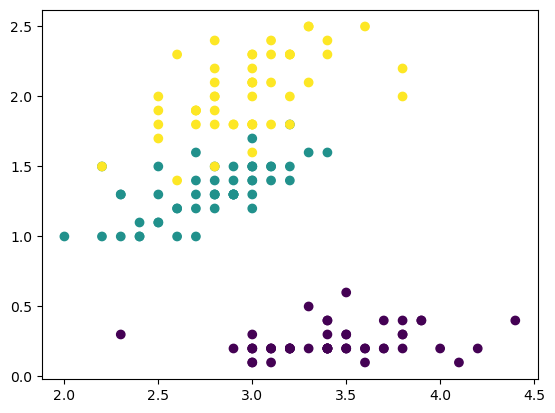

In [22]:
fig, ax = plt.subplots()
ax.scatter(X_iris[:, 1], X_iris[:, 3], c=y_iris);

In [23]:
# Comparing our clusters with truth. Note that we are fitting our
# model to ALL the columns but only plotting two of them!

iris_cluster = AgglomerativeClustering(n_clusters=3)
iris_cluster

AgglomerativeClustering(n_clusters=3)

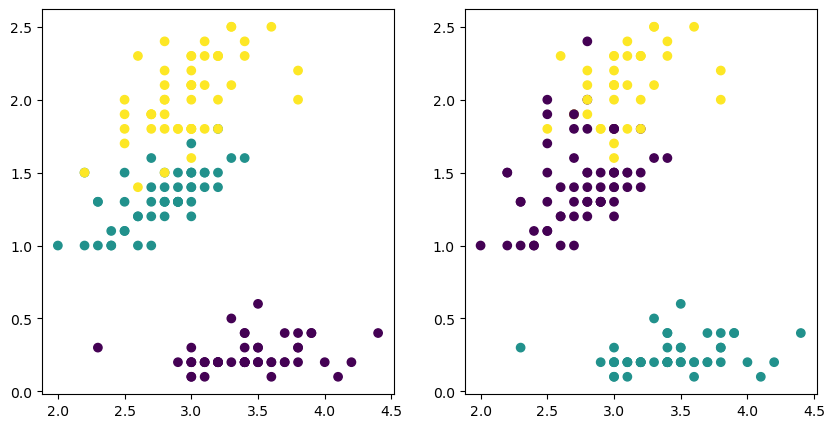

In [24]:
pred_iris_clust = iris_cluster.fit_predict(X_iris)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(X_iris[:, 1], X_iris[:, 3],
             c=y_iris)
ax[1].scatter(X_iris[:, 1], X_iris[:, 3],
           c=pred_iris_clust);

In [25]:
def switch(x):
    if x == 1:
        return 0
    elif x == 0:
        return 1
    else:
        return x

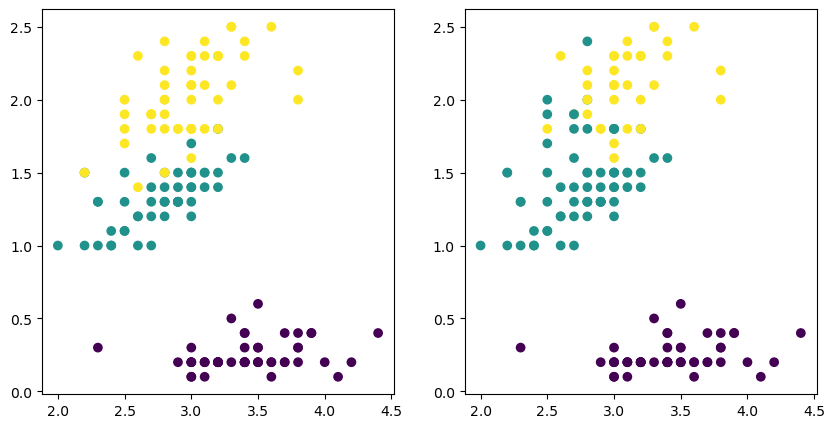

In [26]:
pred_iris_clust = iris_cluster.fit_predict(X_iris)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(X_iris[:, 1], X_iris[:, 3],
             c=y_iris)
ax[1].scatter(X_iris[:, 1], X_iris[:, 3],
           c=list(map(switch, pred_iris_clust)));

#### Evaluate

To evaluate you might try different numbers of clusters and compare their silhouette score as you did with kmeans.

In [27]:
# evaluation: silhouette score

silhouette_score(X_iris, pred_iris_clust)

0.5543236611296419

### Evaluating number of clusters / Cut points

For hierarchical agglomerative clustering, or clustering in general, it is generally difficult to truly evaluate the results. Therefore, it is up you, the data scientists, to decide.

**[Stanford has a good explanation on page 380](https://nlp.stanford.edu/IR-book/pdf/17hier.pdf)** of your options for picking the cut-off. 

When we are viewing dendrograms for hierarchical agglomerative clustering, we can visually examine where the natural cutoff is, despite it not sounding exactly statistical, or scientific. We might want to interpret the clusters and assign meanings to them depending on domain-specific knowledge and shape of dendrogram. However, we can evaluate the quality of our clusters using measurements such as Sihouette score discussed in the k-means lectures. 

## Advantages & Disadvantages of hierarchical clustering

#### Advantages
- Intuitive and easy to implement
- More informative than k-means because it takes individual relationship into consideration
- Allows us to look at dendrogram and decide number of clusters

#### Disadvantages
- Very sensitive to outliers
- Cannot undo the previous merge, which might lead to problems later on 

## Further reading

- [from MIT on just hierarchical](http://web.mit.edu/6.S097/www/resources/Hierarchical.pdf)
- [from MIT comparing clustering methods](http://www.mit.edu/~9.54/fall14/slides/Class13.pdf)
- [fun CMU slides on clustering](http://www.cs.cmu.edu/afs/andrew/course/15/381-f08/www/lectures/clustering.pdf)